일반적 신경망(NN): 한개의 입력층, 여러 은닉층, 하나의 출력층

훈련 데이터가 입력층으로 들어가서 feedforward 진행되고 출력층에서 나가서 손실함수를 계산하고 이 손실함수를 최소화 시키면서 진행

CNN: **내부가 NN과 다름**. *은닉층에 해당하는 부분이 여러개의 컨볼루션 층과 완전연결층으로* 바뀌어있음.

NN의 은닉층 기능을 여러 컨볼루션 층들과 완전연결층이 수행!

완전연결층: 컨볼루션 층의 3차원 출력값을 1차원 벡터로 평탄화 작업 수행하여 일반 신경망 연결처럼 출력층의 모든 노드와 연결시켜주는 역할 수행

컨볼루션층 개요 **총 3개의 층으로 구성**

**conv부분:** 입력데이터와 가중치들의 집합체인 다양한 필터와의 컨볼루션 연산을 통해 **입력데이터의 특징을 추출!!!**

data1 연산 filter_1 + b2 => 입력데이터 data1의 특징 추출

**relu부분:** 입력으로 주어지는 값이 양수면 그대로 음수면 0을 출력

**pooling 부분:** 입력으로 주어지는 정보를 최대값, 최소값, 평균값 등으로 **압축하여 데이터의 연산량을 줄여주는 역할**

max pooling, min polling, average pooling 받아온 입력데이터중 위 3개의 연산중 하나로 압축한다는 의미

**conv 연산**

필터를 일정 간격(스트라이드)으로 이동해 가며, 입력 데이터와 필터에서 대응하는 원소끼리 곱한 후, 그 값들을 모두 더해주는 연산

**relu 연산**

conv에서 나온 것을 입력으로 받아서 그 나온 배열(값들)중 양수만 그대로 내보내고, 음수는 0으로 내보냄

=> max(0,x)

**pooling 연산**

max pooling이 가장 많이 사용된다.

=> 이거는 relu로 나온 배열 중 가장 큰값만 다음층으로 보내줌

**padding 연산**

컨볼루션 연산 수행 전에 입력 데이터 주변을 특정값(0)으로 채우는 것!!!

이거 없으면 데이터의 크기가 줄어들지만 이걸로는 **데이터의 크기 줄어듦을 방지**할 수 있다.

임의적으로 데이터 크기 늘려서 conv 연산으로도 원본 데이터의 크기 유지시킬수 있다.

**컨볼루션 연산을 통한 출력 데이터의 크기(shape) 계산**

*입력 데이터 크기(H, W), 필터크기(FH, FW), 패딩 P, 스트라이드 S 일 때 출력 데이터의 크기(OH, OW) 계산*

OH = ((H + 2*P - FH)/ S)  + 1

OW = ((W + 2*P - FW)/ S)  + 1


**예시: 입력(28,31) 필터(5,5), 패딩2, 스트라이드3 =>**

**출력(10, 11)**

**컨볼루션 층에서 데이터의 특징 추출의 의미???**

예시 가로필터, 대각선필터, 세로필터를 통해서 숫자 필기체 인식을 진행가능!!!

각 숫자마다의 결과값을 학습해서 받아온 값에 대한 결과값 예측이 가능한 것!!!

2를 가로=> [1 1 0 0]

대각 => [1 1 2 2]

세로 => [0 1 0 1]

**풀링 값이 크다는 것은 데이터 안에 해당 필터의 특징이 많이 포함되어 있는 것을 의미함. 즉 특징맵이 압축되어 있는 풀링값을 통해 데이터의 특징을 추출 가능**

**tf.keras.layers.Conv2d**()

**input_shape** : 입력 데이터로 예시로 28*28 크기의 흑백 이미지는 (28, 28, 1)로 나타낸다.(rgb라면 (28,28,3)이다.)

**activation** : 활성화함수는 모르겠으면 일단 relu ㅋㅋㅋ

**kernel의 격자무늬** : (3,3) 이면 3*3 격자무늬

**kernel의 필터개수** : 이 필터개수는 일반적으로 패딩을 사용하지 않았을 때 높이와 너비가 줄어듦에 따라 출력 채널을 늘릴 수 있습니다.

(32, (3,3), activation = 'relu', input_shape=(28,28,1))

**tf.keras.MaxPooling2D**()

MaxPooling2D((2,2)) 라면 총 4부분으로 나누어서 그 중 가장 큰 값 가져오기

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from datetime import datetime

# 데이터 확인

(x_train, t_train), (x_test, t_test) = mnist.load_data()
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

print("train x shape: ", x_train.shape)
print("train label shape: ", t_train.shape)
print("test x shape: ", x_test.shape)
print('test label shape: ', t_test.shape)

train x shape:  (60000, 28, 28, 1)
train label shape:  (60000,)
test x shape:  (10000, 28, 28, 1)
test label shape:  (10000,)


In [10]:
# 데이터 전처리
# 정규화, 원핫 인코딩

# 정규화
x_train = (x_train - 0.0) / (255.0 - 0.0)       # data(new) = (data - min) / (max - min) 픽셀 값의 범위가 0 ~ 255여서 최소 0, 최대 255임!!!
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫인코딩
# 0~9로 총 9개의 분류가 존재
t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

print("train x shape: ", x_train.shape)
print("train label shape: ", t_train.shape)
print("test x shape: ", x_test.shape)
print('test label shape: ', t_test.shape)

train x shape:  (60000, 28, 28, 1)
train label shape:  (60000, 10)
test x shape:  (10000, 28, 28, 1)
test label shape:  (10000, 10)


In [13]:
# 모델 구축및 컴파일

model = tf.keras.Sequential()

# 컨볼루션층
model.add(tf.keras.layers.Conv2D(32 ,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64 ,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64 ,(3,3), activation='relu'))
# 완전연결층
model.add(tf.keras.layers.Flatten())
# 출력층
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
              loss= 'categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [18]:
# 모델 학습
hist = model.fit(x_train, t_train, epochs = 5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0264 - val_accuracy: 0.9921
Epoch 2/5
1313/1313 [==============================] - 45s 34ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0413 - val_accuracy: 0.9870
Epoch 3/5
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0347 - val_accuracy: 0.9905
Epoch 4/5
1313/1313 [==============================] - 44s 34ms/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0403 - val_accuracy: 0.9875
Epoch 5/5
1313/1313 [==============================] - 48s 37ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0364 - val_accuracy: 0.9907


In [19]:
# 모델 평가
model.evaluate(x_test, t_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0360 - accuracy: 0.9904


[0.03602065145969391, 0.9904000163078308]

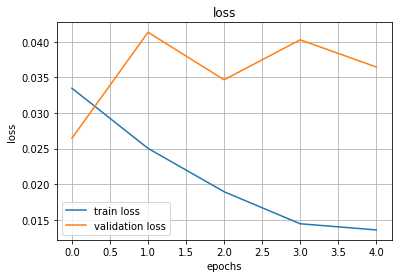

In [20]:
# 손실

import matplotlib.pyplot as plt
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')
plt.show()

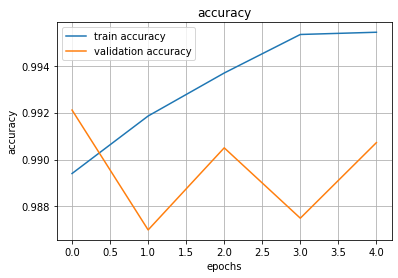

In [21]:
# 정확도

plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')
plt.show()